## Analytic Approximation methods

Analytic approximation methods try to compute approximations to the exact solutions on suitable domains, in the form of truncated series expansions over a system of basis functions.  In the `scipy` stack we have an implementation based on Taylor series, through the routine `odefun` in the module `sympy.mpmath`.


> `mpmath` is a `python` library for arbitrary-precision floating-point arithmetic, hosted inside the `sympy` module.  Although it is independent of the `numpy` machinery, they both work well together.

> For more information about this library, read the official documentation at http://mpmath.org/doc/current

Let us see it in action, first with our trivial example $y'(t)=y(t), y(0)=1$.  The key here is to assess the speed and the accuracy of the approximation, as compared with the actual solution in the interval $[0,1]$

In [13]:
import numpy as np, matplotlib.pyplot as plt
from sympy import mpmath
    
%matplotlib inline

def F(t, y): return y

f = mpmath.odefun(F, 0, 1)

t = np.linspace(0, 1, 1024)
Y1 = np.vectorize(f)(t)
Y2 = np.exp(t)
   
(np.abs(Y1-Y2)).max()

mpf('2.2204460492503131e-16')

Let us examine our second example.  We evaluate time of execution and accuracy of approximation, as compared with the actual solution in the interval $[1,2]$

In [14]:
def F(t, y): return 3.0*y**0.75 - 6.0*y/t
def g(t): return (3.0*t**2.5 + 7)**4.0/(10000.0*t**6.)

f = mpmath.odefun(F, 1.0, 1.0)

t = np.linspace(1, 2, 1024)
Y1 = np.vectorize(f)(t)
Y2 = np.vectorize(g)(t)
   
(np.abs(Y1-Y2)).max()

mpf('5.5511151231257827e-16')

Let us address now the example with the Latko-Volterra system.  We compute the solutions, and plot them for a time range from 0 to 10 units of time.

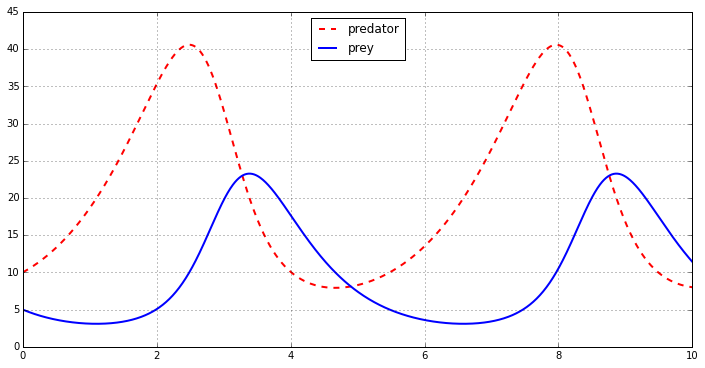

In [15]:
def F(t, y): return [y[0]  - 0.1*y[0]*y[1], 0.075*y[0]*y[1] - 1.5*y[1]]

f = mpmath.odefun(F, 0.0, [10.0, 5.0])

T = [10.0*x/1023. for x in xrange(1024)]
X = [f(10.0*x/1023.)[0] for x in xrange(1024)]
Y = [f(10.0*x/1023.)[1] for x in xrange(1024)]

plt.figure(figsize=(12,6))
plt.plot(T, X, 'r--', linewidth=2.0, label='predator')
plt.plot(T, Y, 'b-',  linewidth=2.0, label='prey')
plt.legend(loc=9)
plt.grid()
plt.show()